In [4]:
import scanpy as sc
sc.set_figure_params(figsize=(4,4))

In [2]:
adata_myeloid = sc.readset_figure_params../../data/50_myeloid_cells/20_cell_type_annotation/adata_annotated.h5ad")
adata = sc.read_h5ad("../../data/20_annotate_all_cells/primary-tumor-annotated-integrated.h5ad")

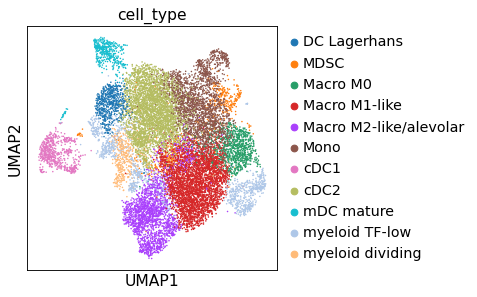

In [5]:
sc.pl.umap(adata_myeloid, color="cell_type")

In [9]:
adata = adata[adata.obs["cell_type"] != "other", :]

/data/scratch/sturm/conda/envs/2021-nsclc_heterogeneity-scanpy/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


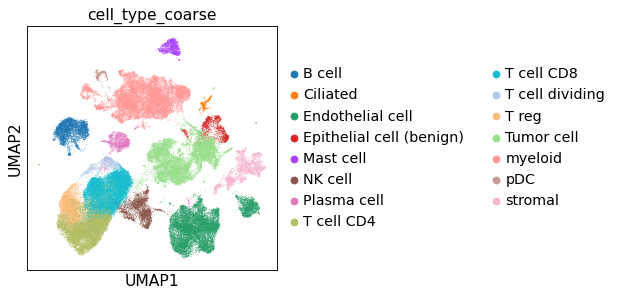

In [10]:
sc.pl.umap(adata, color="cell_type_coarse")

In [18]:
adata_myeloid.write_h5ad("../../data/60_cellphonedb/01_prepare_input_data/adata_myeloid.h5ad")

In [19]:
adata_myeloid.obs.index.name = "Cell"
adata_myeloid.obs.loc[:, "cell_type"].to_csv("../../data/60_cellphonedb/01_prepare_input_data/adata_myeloid.obs.csv")

In [20]:
adata.write_h5ad("../../data/60_cellphonedb/01_prepare_input_data/adata.h5ad")

In [21]:
adata.obs.index.name = "Cell"
adata.obs.loc[:, "cell_type_coarse"].to_csv("../../data/60_cellphonedb/01_prepare_input_data/adata.obs.csv")